# Voltage Decay During Rest

Created: 09/05/2022

Author: Andrew Weng

In [39]:
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import pybamm

import yaml
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from src.formation import FormationCell
import src.plotter as plotter

In [29]:
plotter.initialize(plt)

paths = yaml.load(open('paths.yaml', 'r'), Loader=yaml.FullLoader)
output_path = f"{paths['outputs']}/2022-08-25-manufacturing-features"

In [79]:
cell_nums = np.arange(1, 41)

df_list = []
cellid_list = []

for cell_num in cell_nums:
    cell = FormationCell(cell_num)

    if cell.is_baseline_formation():
        df_list.append(cell.get_formation_data())
        cellid_list.append(cell_num)

<ipython-input-94-6d7d7547e886>:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'{output_path}/fig_rest_voltage_features.png', dpi=300, bbox_inches='tight')
/Users/aweng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


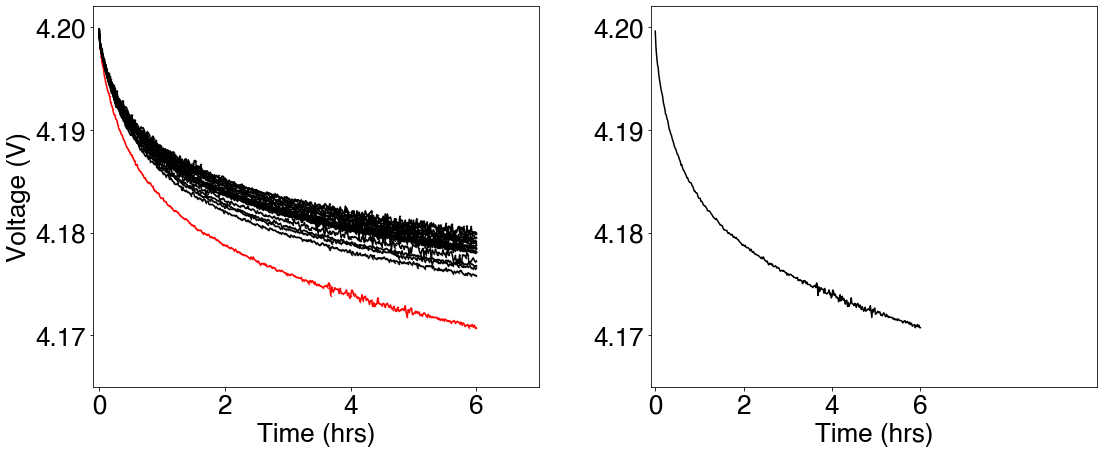

In [94]:
gridspec = dict(wspace=0.25, width_ratios=[1, 1])

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2,
                            gridspec_kw=gridspec,
                            figsize=(18, 7))


for df, cellid in zip(df_list, cellid_list):

    dd = df[df['Step Index'].isin([12])]

    x = dd['Test Time (s)'] - dd['Test Time (s)'].iloc[0]
    x = x/3600

    y = dd['Potential (V)']

    if cellid == 9:
        xx = x
        yy = y

    col = 'r' if cellid == 9 else 'k'

    ax1.plot(x, y, color=col, marker='o', markersize=0.5)
    ax1.set_ylabel('Voltage (V)')

ax2.plot(xx, yy, color='k')

for ax in [ax1, ax2]:
    ax.set_xlim((-0.1, 7))
    ax.set_ylim((4.165, 4.202))
    ax.set_xlabel('Time (hrs)')
    ax.grid(False)

ax2.set_xticks([0, 2, 4, 6])
ax2.set_xlim((-0.1, 10))

plt.savefig(f'{output_path}/fig_rest_voltage_features.png', dpi=300, bbox_inches='tight')

